# 의도 분류 모델 학습 데이터 생성하기

## 0. Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Komoran
import matplotlib.pyplot as plt

## 1. 데이터 불러오기

In [4]:
time_expression = pd.read_csv("../dataset/trans-dataset/시간표현탐지데이터.csv")
purpose = pd.read_csv("../dataset/trans-dataset/용도별목적대화데이터.csv")
topic = pd.read_csv("../dataset/trans-dataset/주제별일상대화데이터.csv")
common_sense = pd.read_csv("../dataset/trans-dataset/일반상식.csv")
movie_review = pd.read_csv("../dataset/trans-dataset/영화리뷰.csv")
# add = pd.read_csv("../../변형데이터/추가데이터.csv")

time_expression.dropna(inplace=True)
purpose.dropna(inplace=True)
topic.dropna(inplace=True)
common_sense.dropna(inplace=True)
movie_review.dropna(inplace=True)
# add.dropna(inplace=True)

In [5]:
print(f"time_expression shape => {time_expression.shape}\n\
purpose shape => {purpose.shape}\n\
topic shape => {topic.shape}\n\
common_sense shape => {common_sense.shape}\n\
movie_review shape => {movie_review.shape}\n\
")
# add => {add.shape}")

time_expression shape => (278781, 1)
purpose shape => (172442, 1)
topic shape => (1445793, 1)
common_sense shape => (68538, 3)
movie_review shape => (199992, 3)



In [6]:
time_expression.columns

Index(['text'], dtype='object')

In [7]:
purpose.columns

Index(['text'], dtype='object')

In [8]:
topic.columns

Index(['text'], dtype='object')

In [9]:
common_sense.columns

Index(['intent', 'query', 'answer'], dtype='object')

In [10]:
movie_review.columns

Index(['id', 'document', 'label'], dtype='object')

In [11]:
# add.columns

In [12]:
# all_data = list(time_expression['text']) + list(purpose['text']) + list(topic['text']) + list(common_sense['query']) \
# + list(common_sense['answer']) + list(add['query'])

all_data = list(time_expression['text']) + list(purpose['text']) + list(topic['text']) + list(common_sense['query']) \
+ list(common_sense['answer']) + list(movie_review['document'])

In [13]:
len(all_data)

2234084

In [14]:
# 통합본 생성하고 저장하기
total = pd.DataFrame({'text': all_data})
total.to_csv("../dataset/trans-dataset/통합본데이터.csv", index=False)

## 2. 의도 분류 데이터 생성하기

0 -> 교수, 1 -> 장소, 2 -> 시간, 3 -> 강의

In [15]:
professor = []
place = []
time = []
lecture = []
etc = []

In [44]:
for i in all_data:
    if ('어디' or '과사' or '강의실' or '장소' or '위치' or '주소' or '과사무실' or '컴공' or '연구실') in i: place.append(i)
    elif ('교수' or '교수님') in i: professor.append(i)
    elif ('언제' or '개강' or '종강' or '학기' or '시작' or '마감' or '기간' or '시간' or '일정' or '날짜' or '일자' or '운영시간' or '강의시간' or '1학기' or '2학기'
                # or '변경일' or '취소일' or '마감일' or '평가일' or '보고일' or '신청일' or '보강일' or '중간고사' or '기말고사' or '정정일' or '종강일' or '교수강의평가일'
    ) in i: time.append(i)
    elif ('학점' or '전공' or '강의' or '수업' or '학년' or '과목') in i: lecture.append(i)
    else: etc.append(i)

In [45]:
len(professor)

1376

In [46]:
professor_label = []
for _ in range(len(professor)):
    professor_label.append(0)
len(professor_label)

1376

In [47]:
len(place)

44668

In [48]:
place_label = []
for _ in range(len(place)):
    place_label.append(1)
len(place_label)

44668

In [49]:
len(time)

38610

In [50]:
time_label = []
for _ in range(len(time)):
    time_label.append(2)
len(time_label)

38610

In [51]:
len(lecture)

388

In [52]:
lecture_label = []
for _ in range(len(lecture)):
    lecture_label.append(3)
len(lecture_label)

388

In [53]:
#import random
#random.seed(42)
#etc_sample = random.sample(etc, 20000)

In [54]:
#etc_sample_label = []
#for _ in range(len(etc_sample)):
#    etc_sample_label.append(3)
#len(etc_sample_label)

In [55]:
train_df = pd.DataFrame({'text':professor+place+time+lecture,
                         'label':professor_label+place_label+time_label+lecture_label})

In [56]:
train_df.head()

,text,label
0,노노 교수들은 힘들다드라,0
1,교수들 엄청 좋아함,0
2,교수님이 말씀하시길 에이는 비래 그래서 고로 에이는 에프래 뭔소리냐 키키,0
3,교수님이 요즘 자꾸 취직했냐고 물어보셔서 부담이 돼,0
4,너 대학원 다닐 때 교수님이 너 별로 안좋아하셨잖아.,0


In [57]:
train_df.tail()

,text,label
85037,한 학기 동안의 해외 인턴십을 수료한 후 본교에서 학기와 학점을 인정받을 수 있는 ...,3
85038,126 ~ 140학점,3
85039,이 영화를 보고 학점이 올랐습니다,3
85040,주인공의 얼굴과 무술에 별두개 영화는 차라리 'f학점의 첩보원'을 보자,3
85041,학점 2.0아래까지 찍어보자,3


In [58]:
train_df[train_df['label']==0]

,text,label
0,노노 교수들은 힘들다드라,0
1,교수들 엄청 좋아함,0
2,교수님이 말씀하시길 에이는 비래 그래서 고로 에이는 에프래 뭔소리냐 키키,0
3,교수님이 요즘 자꾸 취직했냐고 물어보셔서 부담이 돼,0
4,너 대학원 다닐 때 교수님이 너 별로 안좋아하셨잖아.,0
...,...,...
1371,고해성사는 가까운 동네 성당에 가서 하세요. 돈들여 페루까지 가지 말고... 겉 멋...,0
1372,추리에 긴장감도 없고 연기 몰입도도 없고..교수랑 조교만 없으면....혹시나 해서 ...,0
1373,"친절하지도 않고, 방법론에 대한 연구도 없이 그냥 한국영화 역사만 나열했다. 이게 ...",0
1374,어처구니가 없는게 아니 재판에 불만있다고해서 석궁들고 판사에게 찾아간거 자체가 잘못...,0


In [59]:
train_df[train_df['label']==1]

,text,label
1376,그 스탬프를 모으면요 어디서 어떻게 사용하나요,1
1377,네 어디서 전화 주신건가요,1
1378,어디에서나 빛나는 주얼리 브랜드 #@소속# 고객센터 입니다,1
1379,이벤트 당첨 확인은 어디서 하나요,1
1380,아 어디서 볼 수 있는 건가요,1
...,...,...
46039,두남자의 숨막히는 추격전??? 어디??? 아...짱나~,1
46040,선비의 자손으로서 아주 복장 터지는 영화!! 황새는 황새다워야 하고 뱃새는 뱃새다워...,1
46041,감독 집이 어디냐,1
46042,satc원작 드라마에 먹칠을 한거 같은 영화드라마도 5후반까진 괜찮았으나 인기입어 ...,1


In [60]:
train_df[train_df['label']==2]

,text,label
46044,언제,2
46045,언제,2
46046,언제,2
46047,언제,2
46048,언제,2
...,...,...
84649,"아니 이게 뭔 공포냐,,, 런닝타임도 짧고 나름 평도 좋아서 봤는데 특히 마지막부분...",2
84650,힘찬오빤언제나와요?ㅋㅋ왜 예고편엔나왔는데 방송은2주째안나오죠ㅋㅋㅋㅋ,2
84651,소수의 의견도 소중한것까진 알겠는데;; 그 분노가 왜 엉뚱한 사람들을 향하는건데;;...,2
84652,샤를리또갱스브루는 언제나 그렇듯 매력적이긴 하지만 잠깐 스친듯한 인연이 그렇게 오랜...,2


In [61]:
train_df[train_df['label']==3]

,text,label
84654,온라인 교육? 너 학점은행제 하는거야?,3
84655,나는 4학년인데 17학점 듣는중,3
84656,왜? 학점이 많이 안좋아?,3
84657,그래도 더 열심히 해서 최상 수준의 학점을 받았으면 더 좋았겠다 싶어,3
84658,고교학점제 어떻게 생각 해?,3
...,...,...
85037,한 학기 동안의 해외 인턴십을 수료한 후 본교에서 학기와 학점을 인정받을 수 있는 ...,3
85038,126 ~ 140학점,3
85039,이 영화를 보고 학점이 올랐습니다,3
85040,주인공의 얼굴과 무술에 별두개 영화는 차라리 'f학점의 첩보원'을 보자,3


In [62]:
train_df.reset_index(drop=True, inplace=True)

In [63]:
train_df.tail()

,text,label
85037,한 학기 동안의 해외 인턴십을 수료한 후 본교에서 학기와 학점을 인정받을 수 있는 ...,3
85038,126 ~ 140학점,3
85039,이 영화를 보고 학점이 올랐습니다,3
85040,주인공의 얼굴과 무술에 별두개 영화는 차라리 'f학점의 첩보원'을 보자,3
85041,학점 2.0아래까지 찍어보자,3


In [64]:
train_df.to_csv("train_data.csv", index=False)

## 3. 적절한 패딩 길이 구하기

In [65]:
data = pd.read_csv('train_data.csv')

In [66]:
data.shape

(85042, 2)

In [67]:
tokenizer = Komoran()

In [68]:
data_tokenized = [[token+"/"+POS for token, POS in tokenizer.pos(text_)] for text_ in data['text']]

exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            'JX', 'JC',
            'SF', 'SP', 'SS', 'SE', 'SO',
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            'XSN', 'XSV', 'XSA'
]

f = lambda x: x in exclusion_tags

data_list = []
for i in range(len(data_tokenized)):
        temp = []
        for j in range(len(data_tokenized[i])):
            if f(data_tokenized[i][j].split('/')[1]) is False:
                temp.append(data_tokenized[i][j].split('/')[0])
        data_list.append(temp)

In [69]:
num_tokens = [len(tokens) for tokens in data_list]
num_tokens = np.array(num_tokens)

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_tokens)}")
print(f"토큰 길이 최대: {np.max(num_tokens)}")
print(f"토큰 길이 표준편차: {np.std(num_tokens)}")

토큰 길이 평균: 6.152465840408269
토큰 길이 최대: 69
토큰 길이 표준편차: 4.33136465071486


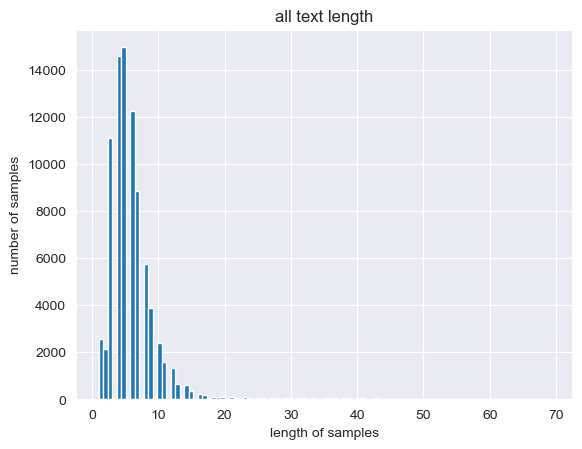

In [70]:
plt.title('all text length')
plt.hist(num_tokens, bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [71]:
select_length = 25

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
        
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
    
below_threshold_len(select_length, data_list)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 0.9891347804614191
